<br>
# ** 11 순차적 데이터에 대한 확률적 추론**
1. **파이썬으로 배우는 인공지능 11장** - 파이썬을 활용한 금융분석
1. **Pandas CookBook** 5장

<br><br>
## **1 Pandas를 사용한 시계열 데이터**
시계열 데이터 활용

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig_size = (22,3)

# 입력 파일에서 데이터를 읽는다
def read_data(input_file, index):
    input_data = np.loadtxt(input_file, delimiter=',')
    to_date    = lambda x, y: str(int(x)) + '-' + str(int(y)) # 읽은 데이터를 날짜형식으로 변환
    start      = to_date(input_data[0, 0], input_data[0, 1])  # 시작일 날짜데이터 추출

    # 종료일 날짜를 추출 
    if input_data[-1, 1] == 12: year, month = input_data[-1, 0] + 1 , 1
    else:                       year, month = input_data[-1, 0] , input_data[-1, 1] + 1

    end          = to_date(year, month)
    date_indices = pd.date_range(start, end, freq='M')                 # 월별 데이터 인덱스 생성
    output       = pd.Series(input_data[:, index], index=date_indices) # 시계열 데이터 타임스탬프 설정
    return output 

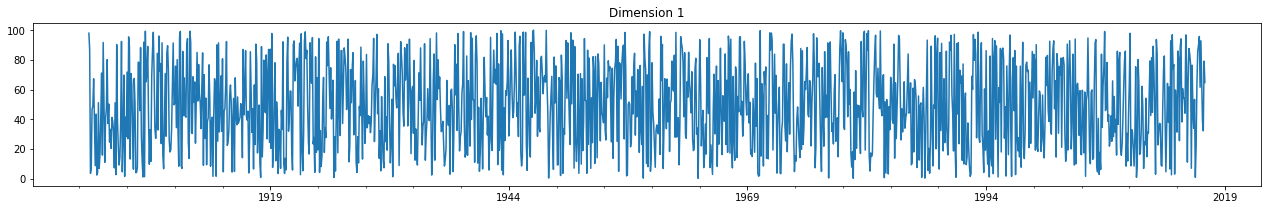

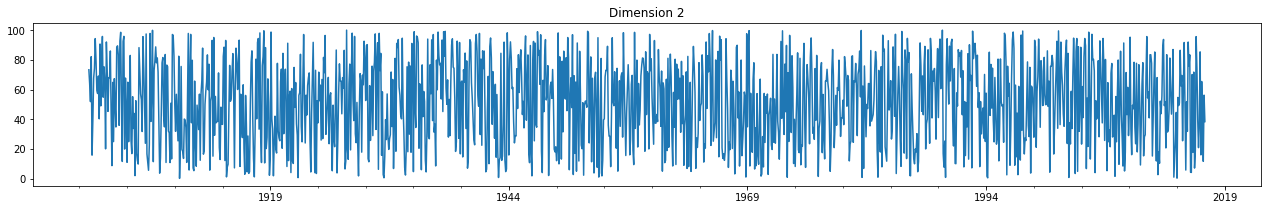

In [2]:
# 열별 데이터를 읽어서 화면에 그린다
input_file = './data/data_2D.txt'  # 입력 데이터를 정의
indices    = [2, 3]                # 시계열 데이터 인덱스로 변환할 열을 지정

for index in indices:
    timeseries = read_data(input_file, index)
    plt.figure(figsize = fig_size)
    timeseries.plot()
    plt.title('Dimension ' + str(index - 1))
plt.show()

<br><br>
## **2 시계열 데이터 분할하기**
시계열 데이터 활용

Text(0.5,1,'Input data from 2003 to 2011')

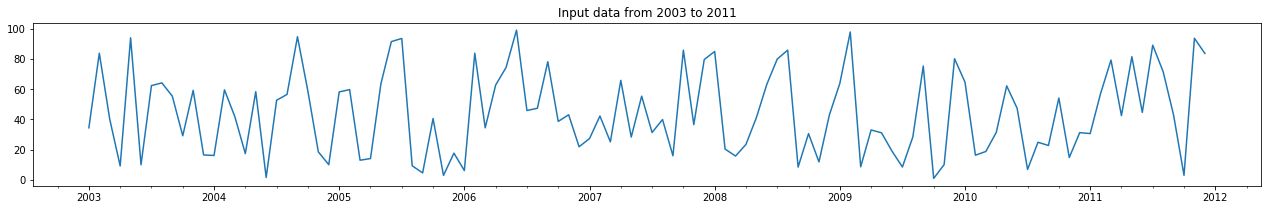

In [3]:
index = 2                     # 분석할 열을 정의한다
data  = read_data(input_file, index)

# 'year-level' 단위로 데이터를 그린다
start, end = '2003', '2011'
plt.figure(figsize = fig_size)
data[start:end].plot()
plt.title('Input data from ' + start + ' to ' + end)

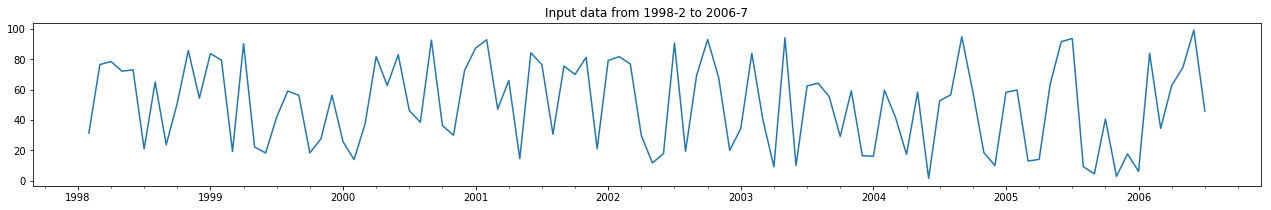

In [4]:
# 'month-level' 단위로 데이터를 그린다
start, end = '1998-2', '2006-7'
plt.figure()
data[start:end].plot(figsize = fig_size)
plt.title('Input data from ' + start + ' to ' + end)
plt.show()

<br><br>
## **3 시계열 데이터 이용하기**
데이터 필터링 및 시계열 변수의 합산

Text(0.5,1,'Data overlapped on top of each other')

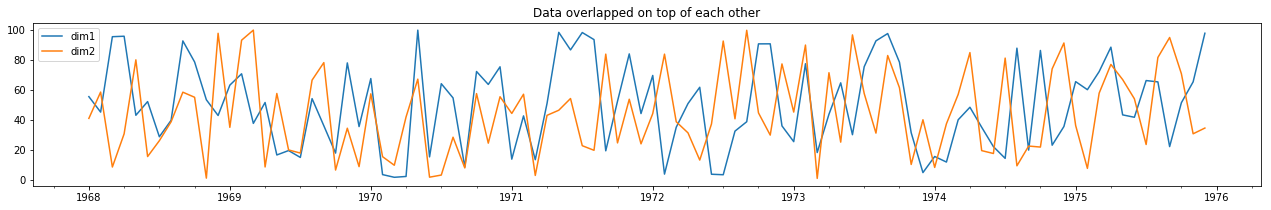

In [5]:
input_file = './data/data_2D.txt'
x1         = read_data(input_file, 2)
x2         = read_data(input_file, 3)

# 두 개의 차원으로 구성된 DataFrame 선언
# 1968 ~ 1975 년의 데이터를 추출하여 분석한다
start, end = '1968', '1975'
data       = pd.DataFrame({'dim1': x1, 'dim2': x2})
data[start:end].plot(figsize = fig_size)
plt.title('Data overlapped on top of each other')

Text(0.5,1,'dim1 < 45 and dim2 > 30')

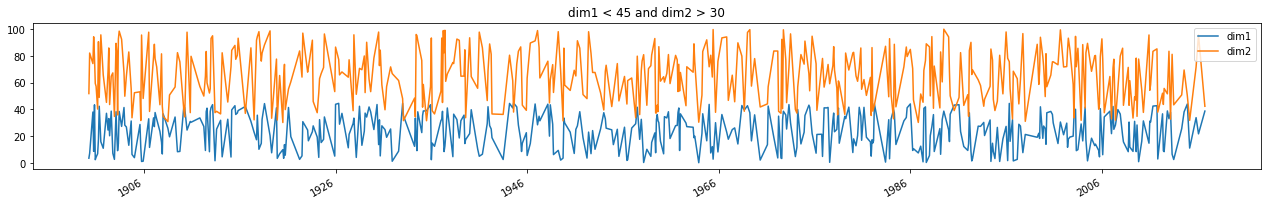

In [6]:
# 조건을 이용한 필터링
data[(data['dim1'] < 45) & (data['dim2'] > 30)].plot(figsize = fig_size)
plt.title('dim1 < 45 and dim2 > 30')

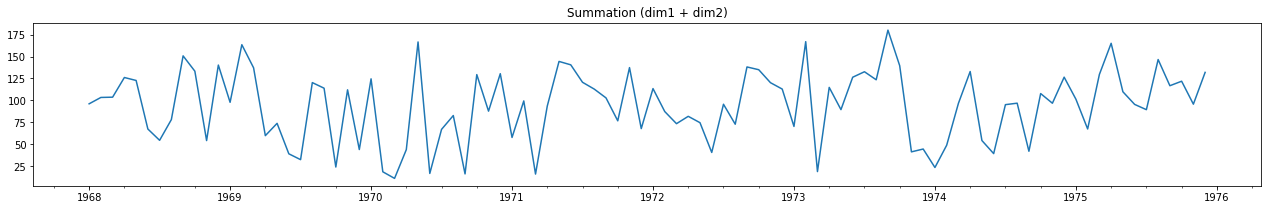

In [7]:
# 데이터 차이를 이용한 필터링
diff = data[start:end]['dim1'] + data[start:end]['dim2']
diff.plot(figsize = fig_size)
plt.title('Summation (dim1 + dim2)')
plt.show()

<br><br>
## **4 시계열 데이터에서 통계 추출**
평균, 분산, 상관관계, 최댓값 등의 기본적 통계적 분석

In [8]:
input_file = './data/data_2D.txt'
x1         = read_data(input_file, 2)  # Pandas.Series 데이터를 추출
x2         = read_data(input_file, 3)  # Pandas.Series 데이터를 추출
data       = pd.DataFrame({'dim1': x1, 'dim2': x2}) # series로 DataFrame 생성

# DataFrame의 최대, 최솟값 추출
print("""\n <개별차원의 최댓값> \n{} \n\n <개별차원의 최솟값> \n{} 
         \n <전체의 평균> \n{} \n\n <열별(Row-wise) 평균>\n {}""".format(
    data.max(), data.min(), data.mean(), data.mean(1)[:12]))


 <개별차원의 최댓값> 
dim1    99.98
dim2    99.97
dtype: float64 

 <개별차원의 최솟값> 
dim1    0.18
dim2    0.16
dtype: float64 
         
 <전체의 평균> 
dim1    49.030541
dim2    50.983291
dtype: float64 

 <열별(Row-wise) 평균>
 1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64


Text(0.5,1,'Rolling mean')

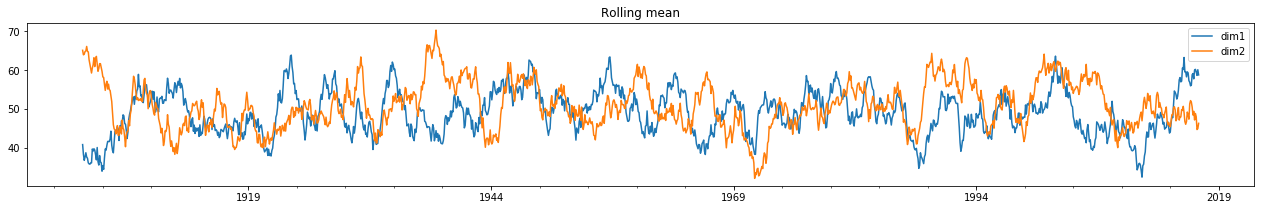

In [9]:
# 이동평균선 그리기
data.rolling(center=False, window=24).mean().plot(figsize=fig_size)
plt.title('Rolling mean')


Correlation coefficients:
          dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


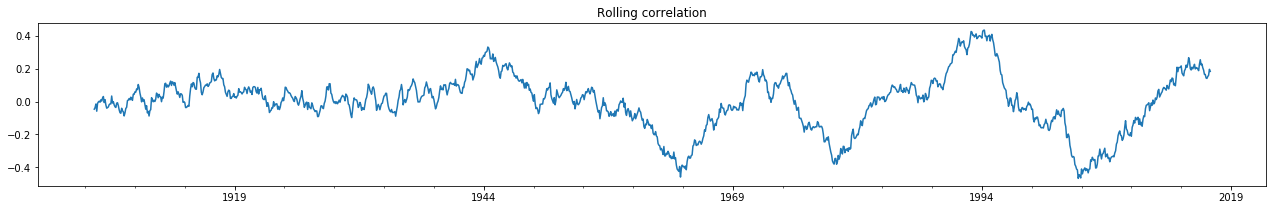

In [10]:
# 상관계수를 출력한다
print('\nCorrelation coefficients:\n', data.corr())

plt.title('Rolling correlation')
data['dim1'].rolling(window=60).corr(other=data['dim2']).plot(figsize = fig_size)

<br><br>
## **5 은닉 마르코프 모델을 사용하여 데이터 생성**
순차적 데이터중 눈으로 관측 불가능한 내재(은닉)상태의 데이터를 처리하는 모델

In [11]:
# pip install --no-cache-dir hmmlearn  cf)yFPE_jbuf 오류 발생시 설치방법
import numpy as np
from hmmlearn.hmm import GaussianHMM

data = np.loadtxt('./data/data_1D.txt', delimiter=',')
X    = np.column_stack([data[:, 2]])  # 3번쨰 컬럼의 데이터를 추출한다

In [12]:
warnings.filterwarnings("ignore")

# Create a Gaussian HMM : 5 개의 Node를 갖고, 대각 공분산으로 구성
num_components = 5
hmm = GaussianHMM(n_components    = num_components,
                  covariance_type = 'diag', 
                  n_iter          = 1000)
hmm.fit(X)                                                # HMM 모델을 만든다 
print('\nTraining the Hidden Markov Model... \n','*'*45)  # HMM stats 를 출력
for i in range(hmm.n_components):
    print('''Hidden state {:2} -  Mean : {:.3f} \\ Variance : {:.3f}'''.format(
        i+1, hmm.means_[i][0], np.diag(hmm.covars_[i])[0]))


Training the Hidden Markov Model... 
 *********************************************
Hidden state  1 -  Mean : 0.603 \ Variance : 0.253
Hidden state  2 -  Mean : 4.598 \ Variance : 0.252
Hidden state  3 -  Mean : 8.596 \ Variance : 0.260
Hidden state  4 -  Mean : 2.600 \ Variance : 0.259
Hidden state  5 -  Mean : 6.586 \ Variance : 0.253


Text(0.5,1,'Generated data')

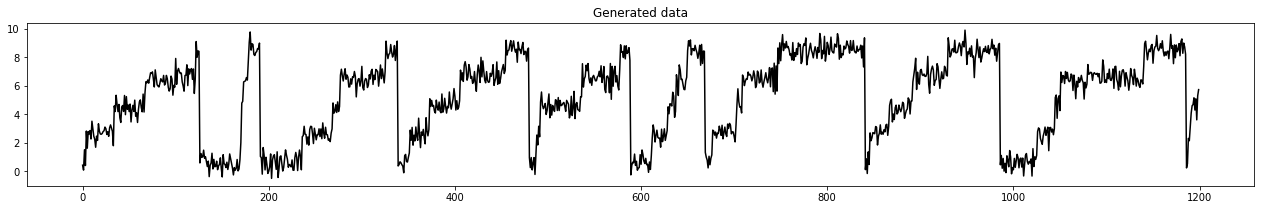

In [13]:
# 학습한 'hmm'모델을 사용하여
# 1,200 개 HMM model 샘플을 생성한다
num_samples       = 1200
generated_data, _ = hmm.sample(num_samples) 
plt.figure(figsize = fig_size)
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

<br><br>
## **6 조건부 랜덤필드로 알파벳 예측**
순차적 데이터중 눈으로 관측 불가능한 내재(은닉)상태의 데이터를 처리하는 모델

In [14]:
import os
import argparse 
import string
import pickle 

from pystruct.datasets import load_letters
from pystruct.models import ChainCRF 
from pystruct.learners import FrankWolfeSSVM

In [15]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Trains a Conditional\
            Random Field classifier')
    parser.add_argument("--C", dest="c_val", required=False, type=float,
            default=1.0, help='C value to be used for training')
    return parser

In [16]:
# Class to model the CRF
class CRFModel(object):
    def __init__(self, c_val=1.0):
        self.clf = FrankWolfeSSVM(model=ChainCRF(), 
                C=c_val, max_iter=50) 

    # Load the training data
    def load_data(self):
        alphabets = load_letters()
        X = np.array(alphabets['data'])
        y = np.array(alphabets['labels'])
        folds = alphabets['folds']

        return X, y, folds

    # Train the CRF
    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    # Evaluate the accuracy of the CRF
    def evaluate(self, X_test, y_test):
        return self.clf.score(X_test, y_test)

    # Run the CRF on unknown data
    def classify(self, input_data):
        return self.clf.predict(input_data)[0]

In [17]:
# Convert indices to alphabets
def convert_to_letters(indices):
    # Create a numpy array of all alphabets
    alphabets = np.array(list(string.ascii_lowercase))

    # Extract the letters based on input indices
    output = np.take(alphabets, indices)
    output = ''.join(output)

    return output

In [18]:
# args        = build_arg_parser().parse_args()
# c_val       = args.c_val
# crf         = CRFModel(c_val)  # Create the CRF model
# X, y, folds = crf.load_data()  # Load the train and test data

# X_train, X_test = X[folds == 1], X[folds != 1]
# y_train, y_test = y[folds == 1], y[folds != 1]

# print('\nTraining the CRF model...', crf.train(X_train, y_train)) # Train the CRF model
# score = crf.evaluate(X_test, y_test)                              # Evaluate the accuracy
# print('\nAccuracy score =', str(round(score*100, 2)) + '%')
# indices = range(3000, len(y_test), 200)
# for index in indices:
#     print("\nOriginal  =", convert_to_letters(y_test[index]))
#     predicted = crf.classify([X_test[index]])
#     print("Predicted =", convert_to_letters(predicted))

<br><br>
## **7 주식시장 분석하기**
1. 출처1 : http://agfree.esy.es/uncategorized/1%EC%B0%A8-%EC%B0%A8%EB%B6%84first-differences/
1. 출처2 : https://datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/
1. 시세를 분석하기 위해선, 시세 데이터에 자기회귀내용이 있는지를 확인할 필요가 있다
1. 하지만 _주가 시계열 데이터_는 **비정상 확률 과정(nonstationary process)** 을 갖는다
1. 비정상 확률 과정의 분석을 위한 데이터를 변환 과정으로는.. 
    1. 차분 np.diff()
    1. 백분율 혹은 로그변환 .pct_change(), np.log()
    1. Box-Cox 변환
1. 위와 같은 방법으로 변환한 데이터를 사용하면, **선형회귀 모델 (자기 회귀 방정식)** 과 같은 가설의 성립이 가능하다
    1. ex) $(오늘의 주가변동) = weight * (어제의 주가변동) + bias + error $
1. 위 모델은 **랜덤워크** 방정식을 활용하는 모델이다
1. 만일 **bias = 0 이면 고전적인 형태**의 랜덤 워크, **a > 0 혹은 a < 0** 이면 **일정 방향으로의 드리프트(drift)** 가 있는 랜덤 워크가 된다.
1. **weight가 1보다 작은** 경우는 **정상성(stationarity)** 을 갖고, 단위근을 가지는 자기 회귀 구조는 정상성을 띄지 않는다.
1. **정상성**은 평균 회귀(mean reverting)성질로, 통계학적으로는 어떤 시점에서도 **평균과 표준편차가 동일**하다
1. **정상성**을 띄면 평균으로부터 벗어나도 결국 계속 평균으로 돌아오게 되고, **정상 시계열(stationary time series)모델** 을 통한 장기적인 예측이 가능하다
1. 비정상 시계열은 평균 회귀를 하지 않고 어디로 흘러갈지 알 수가 없게 된다
1. 1차 차분 { first difference : ex)오늘의 주가 – 어제의 주가 } 의 시계열은 정상 시계열과 조금 더 가까워진다.
1. 단위근 비정상 시계열을 분석할 때는 **1차 차분으로 구성된 시계열에 자기 회귀 구조**를 살피게 되며, 여기서도 비정상성을 띠게 되면 다시 차분을 구하는 것을 반복하여 결국 백색잡음이 나올 때까지 차분 과정을 반복하면서 분석하는 것이 일반적이다

In [19]:
import datetime, warnings
from hmmlearn.hmm import GaussianHMM
from googlefinance.get import get_data_yahoo, get_data

stock_quotes = get_data('NASDAQ:INTC', '10Y')
closing_quotes   = np.array(stock_quotes.close)
volumes          = np.array(stock_quotes.volume)[1:]     # 거래량 데이터 추출
diff_percentages = 100.0 * np.diff(closing_quotes) / closing_quotes[:-1]  # 종가 변화율 계산
dates            = np.array(stock_quotes.index)[1:]  # 두번째 날부터 데이터로 처리
training_data    = np.column_stack([diff_percentages, volumes])  # 학습을 위해 변화율과 거B래량 데이터를 생성

In [20]:
# 기우시안 HMM 모델을 생성한다 
hmm = GaussianHMM(n_components = 7, 
                  covariance_type = 'diag', 
                  n_iter = 1000)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    hmm.fit(training_data)

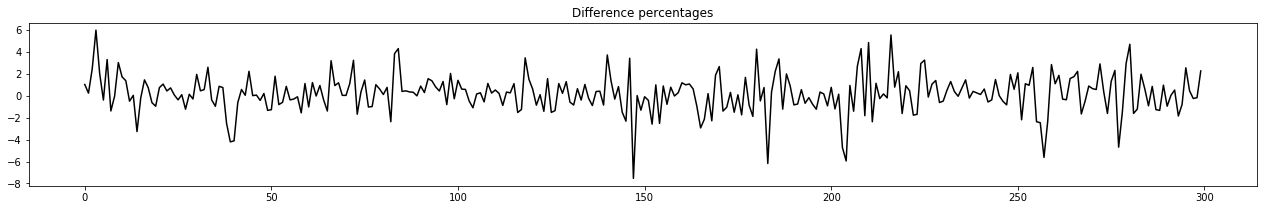

In [21]:
# (변화율) HMM model 모델을 사용하여 예측데이터 생성하기
num_samples = 300 
samples, _  = hmm.sample(num_samples) 

plt.figure(figsize=fig_size)
plt.title('Difference percentages')
plt.plot(np.arange(num_samples), samples[:, 0], c='black')

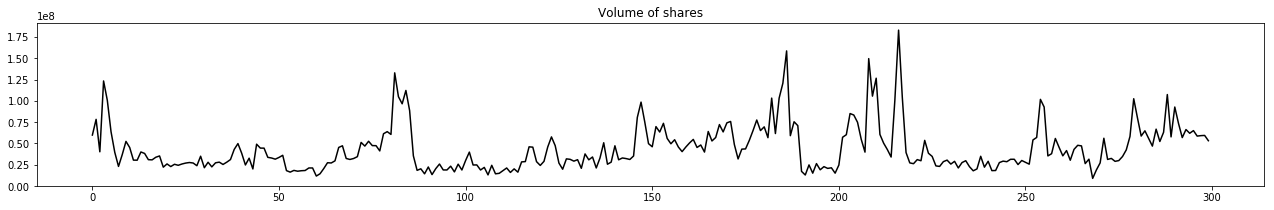

In [22]:
# (거래량) HMM model 모델을 사용하여 예측데이터 생성하기
plt.figure(figsize=fig_size)
plt.title('Volume of shares')
plt.plot(np.arange(num_samples), samples[:, 1], c='black')

<br><br>
## **7 주식시장의 정규성  분석**
Gaining perspective on stock prices

In [27]:
# from googlefinance.get import get_data_yahoo, get_data
# slb = get_data('NASDAQ:INTC', '3Y')
slb = stock_quotes
del slb['code']
slb.head(3)

,open,high,low,close,volume
date,,,,,
2008-04-17,22.43,22.48,21.86,22.13,109029367
2008-04-18,22.17,22.30,21.92,22.11,57754022
2008-04-19,22.57,22.63,22.23,22.55,68286038


In [28]:
slb_close = slb['close']
# 10% ~ 90% 범위의 데이터를 대상으로 통게적 분석
slb_summary = slb_close.describe( percentiles=[.1, .9] ) 
slb_summary

count    2516.000000
mean       26.910763
std         7.859021
min        12.080000
10%        18.995000
50%        24.715000
90%        36.395000
max        52.720000
Name: close, dtype: float64

In [29]:
# criteria : slb_close 의 10% ~ 90% 범위 데이터를 Masking (True / False)
# slb_top_bottom_10 : criteria Masking 데이터를 기준으로 Filter 적용

# 10% , 90% 에 해당하는 데이터값 추출
upper_10           = slb_summary.loc['90%']
lower_10           = slb_summary.loc['10%']
criteria           = (slb_close < lower_10) | (slb_close > upper_10)  
slb_top90_bottom10 = slb_close[criteria]

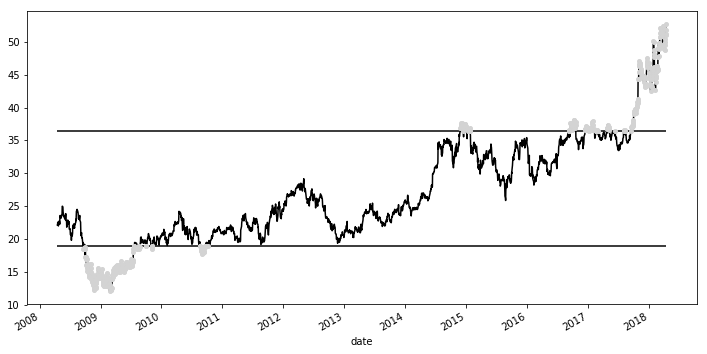

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
slb_close.plot(color='black', figsize=(12,6))
slb_top90_bottom10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y = [lower_10, upper_10], 
           xmin  = xmin, 
           xmax  = xmax,
           color = 'black')

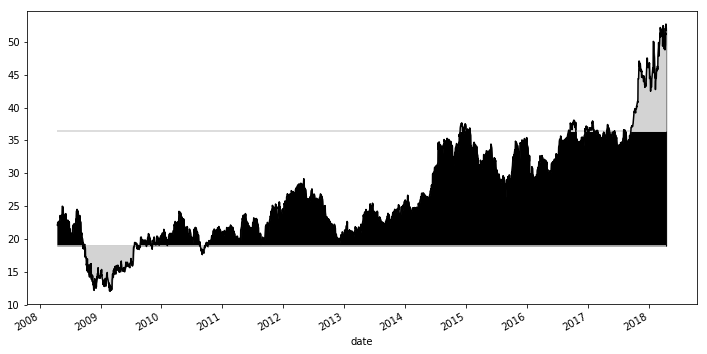

In [31]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y     = [lower_10, upper_10], 
           xmin  = xmin, 
           xmax  = xmax,
           color = 'lightgray')

plt.fill_between(x = criteria.index, y1 = lower_10, y2 = slb_close.values, 
                 color = 'black')
plt.fill_between(x = criteria.index, y1 = lower_10, y2 = slb_close.values, 
                 where = slb_close < lower_10,
                 color = 'lightgray')
plt.fill_between(x = criteria.index, y1 = upper_10, y2 = slb_close.values, 
                 where = slb_close > upper_10,
                 color = 'lightgray')

<br><br>
## **8 주식시장 HMM 모델을 활용하여 예측하기**
1. 출처1 : http://agfree.esy.es/uncategorized/1%EC%B0%A8-%EC%B0%A8%EB%B6%84first-differences/
1. 출처2 : https://datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/
1. 시세를 분석하기 위해선, 시세 데이터에 자기회귀내용이 있는지를 확인할 필요가 있다
1. 하지만 _주가 시계열 데이터_는 **비정상 확률 과정(nonstationary process)** 을 갖는다
1. 비정상 확률 과정의 분석을 위한 데이터를 변환 과정으로는.. 
    1. 차분 np.diff()
    1. 백분율 혹은 로그변환 .pct_change(), np.log()
    1. Box-Cox 변환
1. 위와 같은 방법으로 변환한 데이터를 사용하면, **선형회귀 모델 (자기 회귀 방정식)** 과 같은 가설의 성립이 가능하다
    1. ex) $(오늘의 주가변동) = weight * (어제의 주가변동) + bias + error $
1. 위 모델은 **랜덤워크** 방정식을 활용하는 모델이다
1. 만일 **bias = 0 이면 고전적인 형태**의 랜덤 워크, **a > 0 혹은 a < 0** 이면 **일정 방향으로의 드리프트(drift)** 가 있는 랜덤 워크가 된다.
1. **weight가 1보다 작은** 경우는 **정상성(stationarity)** 을 갖고, 단위근을 가지는 자기 회귀 구조는 정상성을 띄지 않는다.
1. **정상성**은 평균 회귀(mean reverting)성질로, 통계학적으로는 어떤 시점에서도 **평균과 표준편차가 동일**하다
1. **정상성**을 띄면 평균으로부터 벗어나도 결국 계속 평균으로 돌아오게 되고, **정상 시계열(stationary time series)모델** 을 통한 장기적인 예측이 가능하다
1. 비정상 시계열은 평균 회귀를 하지 않고 어디로 흘러갈지 알 수가 없게 된다
1. 1차 차분 { first difference : ex)오늘의 주가 – 어제의 주가 } 의 시계열은 정상 시계열과 조금 더 가까워진다.
1. 단위근 비정상 시계열을 분석할 때는 **1차 차분으로 구성된 시계열에 자기 회귀 구조**를 살피게 되며, 여기서도 비정상성을 띠게 되면 다시 차분을 구하는 것을 반복하여 결국 백색잡음이 나올 때까지 차분 과정을 반복하면서 분석하는 것이 일반적이다